# Project: Predicting S&P500 Stock Price from Historical Data

Dataset is from Kaggle.

Larxel. (2024a, December 23). S&P 500 stocks (daily updated). Kaggle. https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_companies.csv

Larxel. (2024, December 23). S&P 500 stocks (daily updated). Kaggle. https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_stocks.csv

## Exploratory Data Analysis

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
# Import datasest from Kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/sp-500-stocks")

print("Path to dataset files:", path)

filename = 'sp500_companies.csv'

csv_path = os.path.join(path, filename)
df = pd.read_csv(csv_path)

pd.set_option('display.max_columns', None)

df.head()

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/andrewmvd/sp-500-stocks/versions/1023


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [3]:
# Description of each feature

Appendix = pd.DataFrame({
    'Feature': [
        'Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry', 'Currentprice',
        'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State', 'Country',
        'Fulltimeemployees', 'Longbusinesssummary', 'Weight'
    ],
    'Description': [
        'Exchange where its stocks are negotiated',
        'Stock symbol',
        'Company short name',
        'Company long name',
        'Sector where the company operates',
        'Industry, within a sector, where the company operates',
        'Current stock price',
        'Current marketcap',
        'Earnings before interest, taxes, depreciation and amortization',
        'Revenue growth',
        'Headquarters city',
        'Headquarters state',
        'Headquarters country',
        'Number of full-time employees',
        'Summary of the company',
        'Percentage of participation on the S&P index (marketcap %)'
    ]
})

pd.set_option('display.max_colwidth', None)

Appendix

,Feature,Description
0,Exchange,Exchange where its stocks are negotiated
1,Symbol,Stock symbol
2,Shortname,Company short name
3,Longname,Company long name
4,Sector,Sector where the company operates
5,Industry,"Industry, within a sector, where the company operates"
6,Currentprice,Current stock price
7,Marketcap,Current marketcap
8,Ebitda,"Earnings before interest, taxes, depreciation and amortization"
9,Revenuegrowth,Revenue growth


In [4]:
df.info() # Get general info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               502 non-null    flo

In [5]:
df.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,502.000000,5.020000e+02,4.730000e+02,499.000000,4.930000e+02,502.000000
mean,217.893685,1.107222e+11,7.045286e+09,0.070541,5.782761e+04,0.001992
std,489.205027,3.440074e+11,1.624213e+10,0.180247,1.395988e+05,0.006189
min,9.400000,4.664099e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000084
25%,68.547500,1.933417e+10,1.625000e+09,0.002000,1.020000e+04,0.000348
50%,118.365000,3.706396e+10,2.952748e+09,0.051000,2.169000e+04,0.000667
75%,227.667500,7.830565e+10,6.020000e+09,0.109000,5.510000e+04,0.001409
max,8276.780000,3.846820e+12,1.495470e+11,1.632000,2.100000e+06,0.069209


In [6]:
df.isnull().sum() # Find missing values

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees       9
Longbusinesssummary     0
Weight                  0
dtype: int64

In [7]:
# Impute for missing values - use average for Ebitda / Fulltimeemployees / Revenuegrowth, mode for State

from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
df[['Ebitda', 'Fulltimeemployees', 'Revenuegrowth']] = num_imputer.fit_transform(df[['Ebitda', 'Fulltimeemployees', 'Revenuegrowth']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[['State']] = cat_imputer.fit_transform(df[['State']])

df.isnull().sum()

Exchange               0
Symbol                 0
Shortname              0
Longname               0
Sector                 0
Industry               0
Currentprice           0
Marketcap              0
Ebitda                 0
Revenuegrowth          0
City                   0
State                  0
Country                0
Fulltimeemployees      0
Longbusinesssummary    0
Weight                 0
dtype: int64

In [8]:
df.duplicated().sum() # Find duplicated rows

np.int64(0)

In [9]:
df.nunique() # Find the number of unique values of each feature

Exchange                 4
Symbol                 502
Shortname              499
Longname               499
Sector                  11
Industry               114
Currentprice           499
Marketcap              502
Ebitda                 470
Revenuegrowth          261
City                   235
State                   41
Country                  8
Fulltimeemployees      388
Longbusinesssummary    499
Weight                 502
dtype: int64

## Visualization

<Axes: >

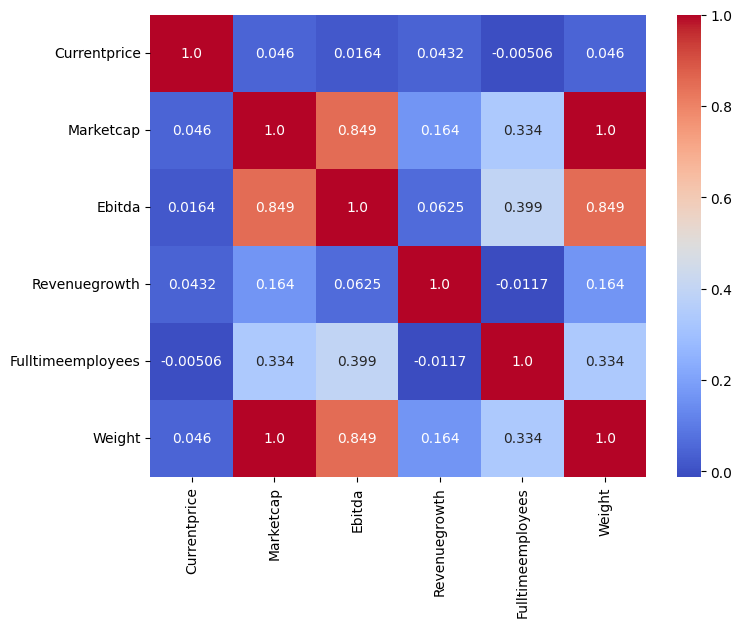

In [10]:
# Heatmap of numerical features

num_df = df.select_dtypes(include=['number']) # Extract numerical features

corr_num = num_df.corr() # Find correlations

plt.figure(figsize=(8,6))
heatmap = sns.heatmap(corr_num, cmap='coolwarm', annot=True, fmt='0.3')

heatmap

In [11]:
# Get highest correlation pairs of numerical features

unstack_corr = corr_num.unstack() # unstack
corr_pairs = unstack_corr[unstack_corr.index.get_level_values(0) != unstack_corr.index.get_level_values(1)] # drop self-correlations
strong_corr_pairs = corr_pairs[abs(corr_pairs) >= 0.5] # Get pairs with correlations of 0.5 or greater
strong_corr_pairs = strong_corr_pairs.sort_values(ascending=False).drop_duplicates() # Drop duplicates

strong_corr_pairs

Marketcap  Weight    1.000000
Weight     Ebitda    0.848521
Marketcap  Ebitda    0.848521
dtype: float64

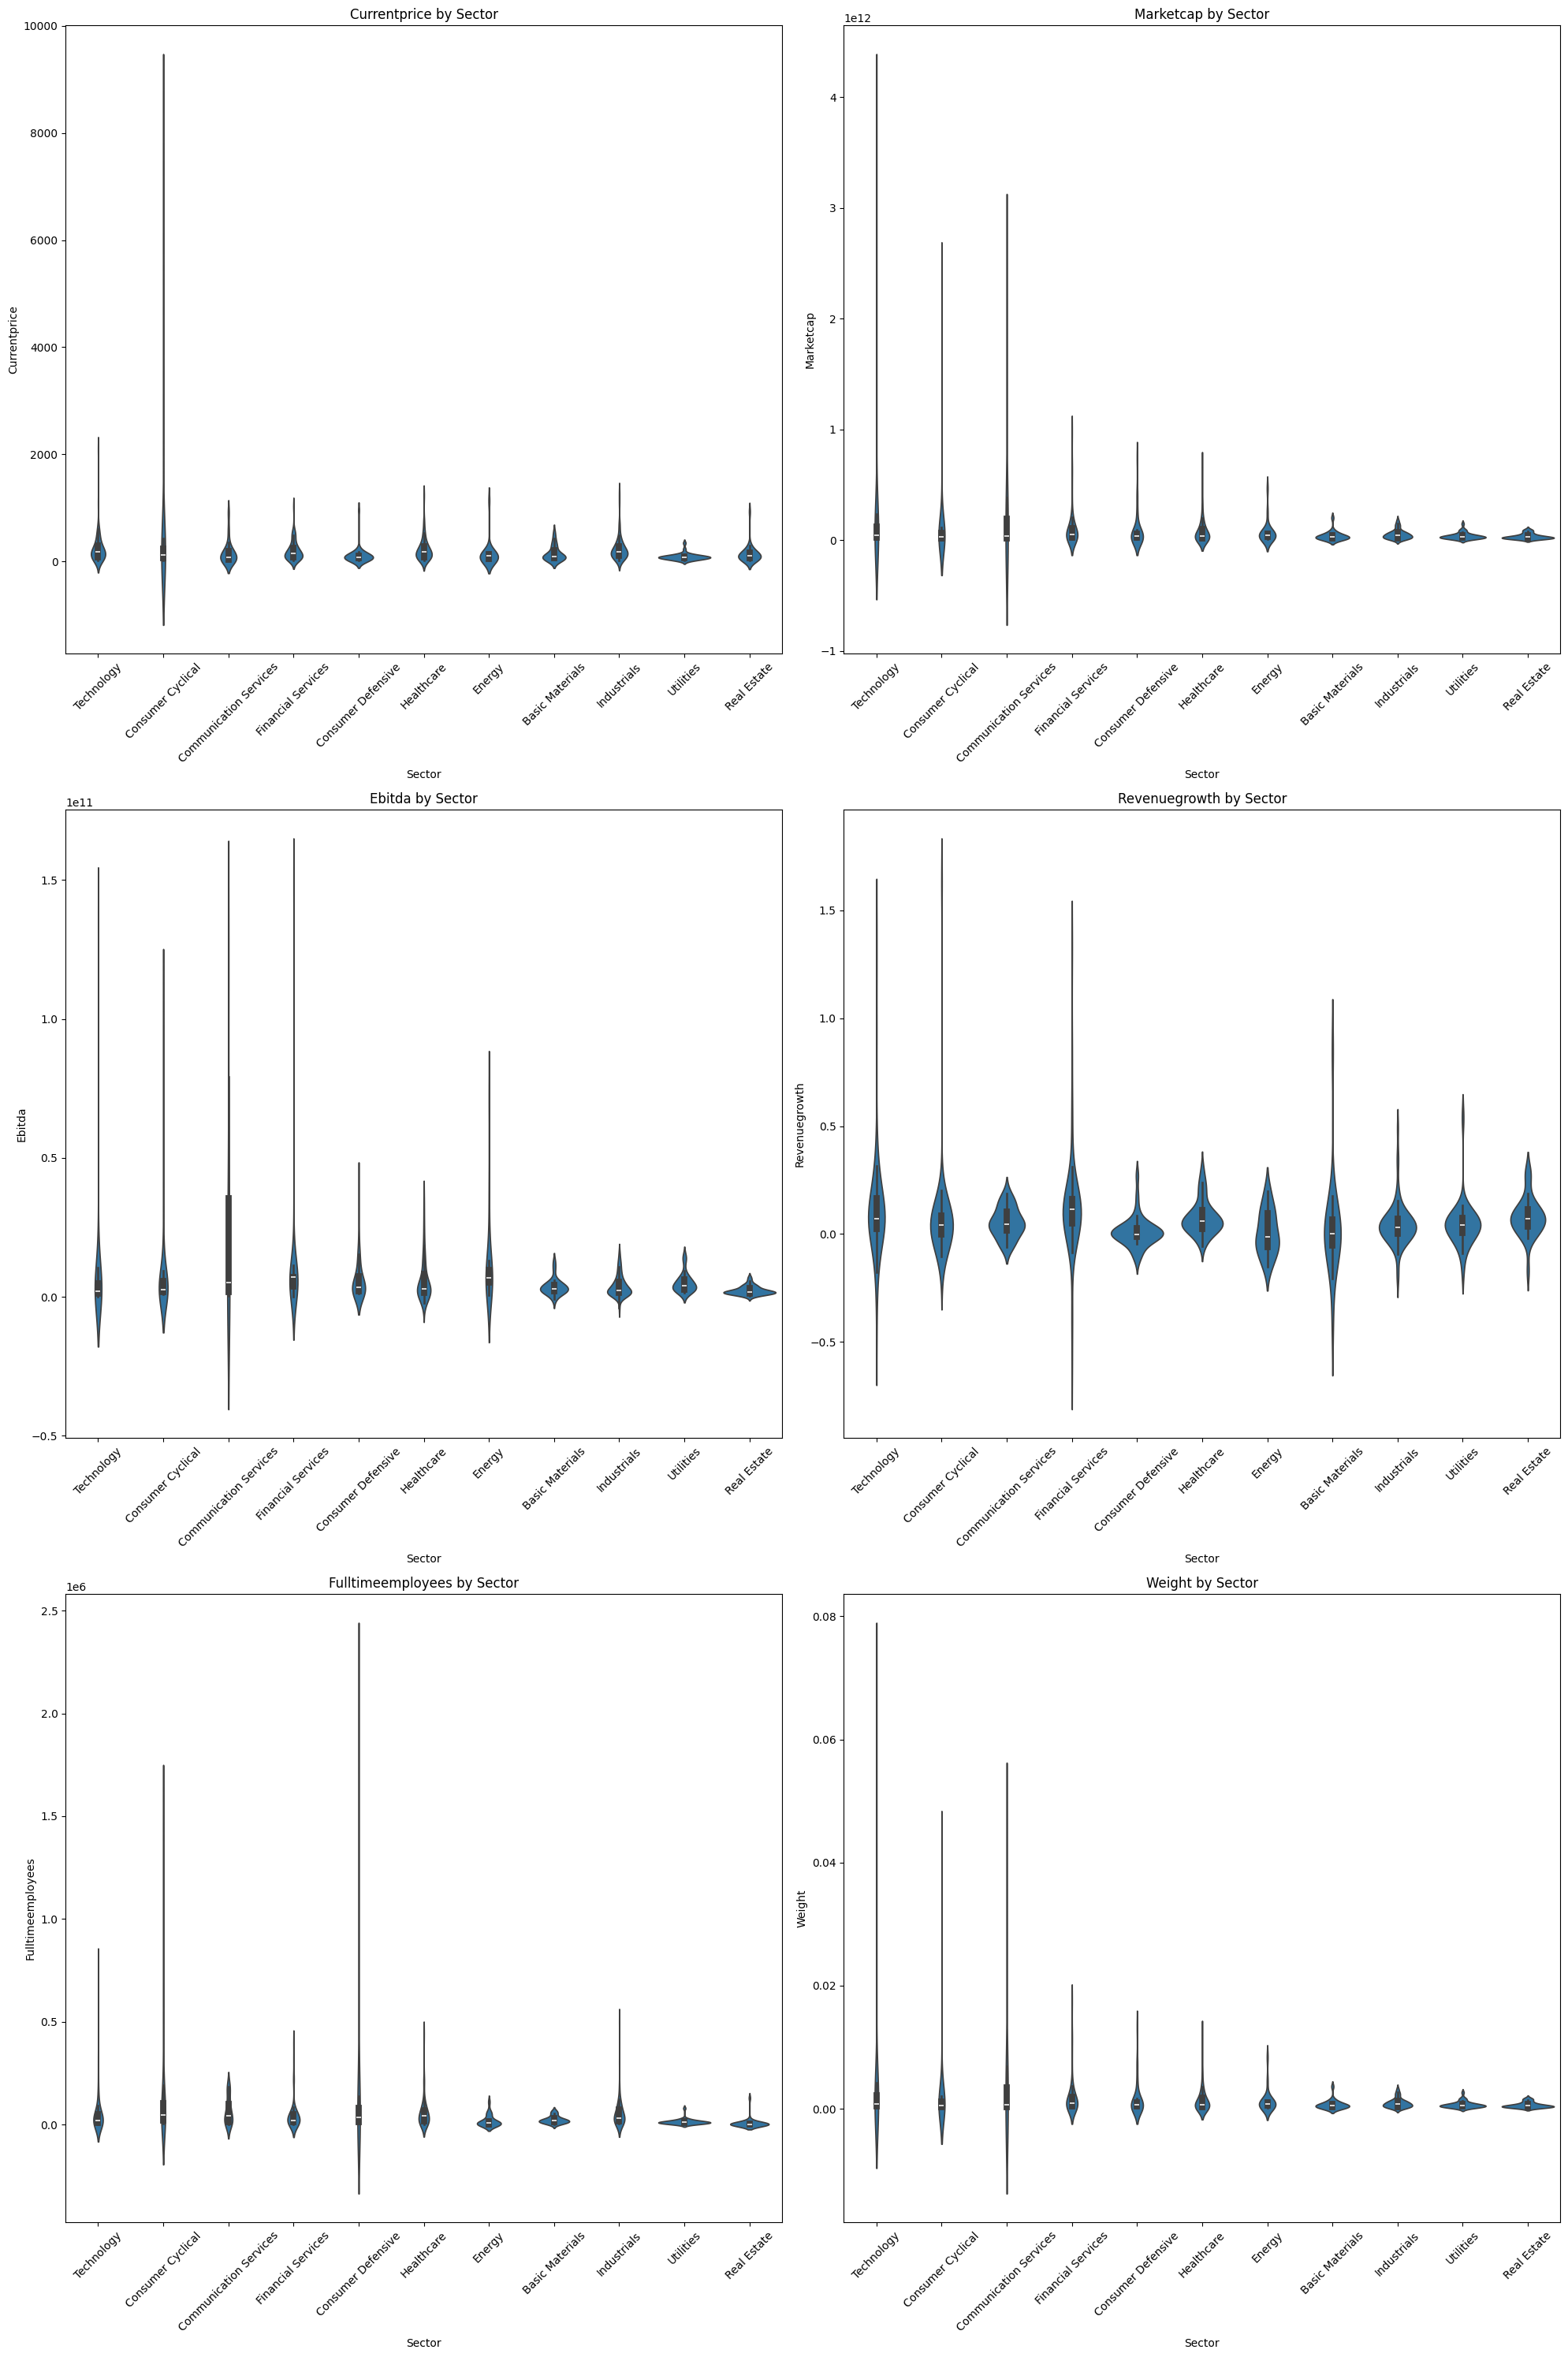

In [12]:
# Violin plot to see data distribution in each Sector

num_df = df.select_dtypes(include=['number']) # extract numerical features

cat_feature = 'Sector' # Use this categorical feature for graphing all num features

n_cols = 2
n_rows = (len(num_df.columns) + n_cols - 1) // n_cols
plt.figure(figsize=(20,30))

for i, col in enumerate(num_df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(x=cat_feature, y=col, data=df)
    plt.title(f'{col} by {cat_feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


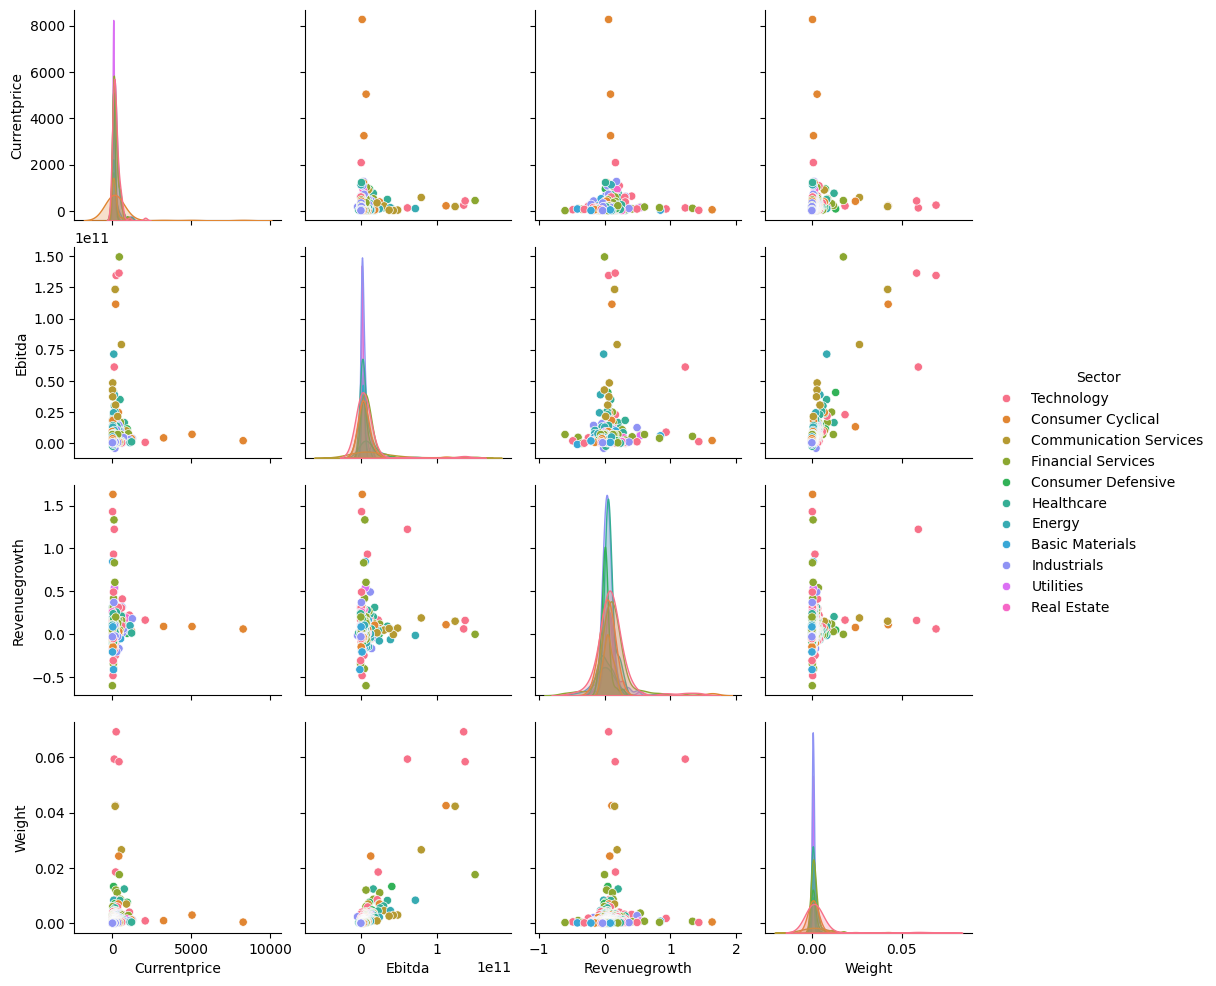

In [13]:
# Pairplot

pp_features = ['Currentprice', 'Ebitda', 'Revenuegrowth', 'Weight']

sns.pairplot(df[pp_features + ['Sector']], hue='Sector')

## Import time data to build models

In [14]:
filename2 = 'sp500_stocks.csv'

csv_path2 = os.path.join(path, filename2)
df_stocks = pd.read_csv(csv_path2)

pd.set_option('display.max_columns', None)

df_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_stocks.isnull().sum()

Date               0
Symbol             0
Adj Close    1273705
Close        1273705
High         1273705
Low          1273705
Open         1273705
Volume       1273705
dtype: int64

In [16]:
df_stocks = df_stocks.dropna() # 67% of rows are null values
df_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
3768,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0
3769,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0
3770,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0
3771,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0
3772,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0


In [17]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617831 entries, 3768 to 1876463
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       617831 non-null  object 
 1   Symbol     617831 non-null  object 
 2   Adj Close  617831 non-null  float64
 3   Close      617831 non-null  float64
 4   High       617831 non-null  float64
 5   Low        617831 non-null  float64
 6   Open       617831 non-null  float64
 7   Volume     617831 non-null  float64
dtypes: float64(6), object(2)
memory usage: 42.4+ MB


In [18]:
df_merged = pd.merge(df, df_stocks, on='Symbol', how='inner')

df_merged['Date'] = pd.to_datetime(df_merged['Date'])

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100) 

df_merged.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,Date,Adj Close,Close,High,Low,Open,Volume
0,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.7,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics and compute and networking solutions in the United States, ...",0.05935,2010-01-04,0.423923,0.46225,0.4655,0.45275,0.46275,800204000.0
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.7,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics and compute and networking solutions in the United States, ...",0.05935,2010-01-05,0.430113,0.46900,0.4740,0.46050,0.46050,728648000.0
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.7,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics and compute and networking solutions in the United States, ...",0.05935,2010-01-06,0.432864,0.47200,0.4730,0.46425,0.46875,649168000.0
3,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.7,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics and compute and networking solutions in the United States, ...",0.05935,2010-01-07,0.424381,0.46275,0.4715,0.45925,0.46950,547792000.0
4,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.7,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics and compute and networking solutions in the United States, ...",0.05935,2010-01-08,0.425298,0.46375,0.4670,0.45625,0.45900,478168000.0


In [19]:
df_merged = df_merged.sort_values(by=['Symbol', 'Date'])
pd.set_option('display.max_colwidth', 100) 
df_merged.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,Date,Adj Close,Close,High,Low,Open,Volume
36959,NYQ,ABBV,AbbVie Inc.,AbbVie Inc.,Healthcare,Drug Manufacturers - General,175.58,310274424832,2.563000e+10,0.038,North Chicago,IL,United States,50000.0,"AbbVie Inc. discovers, develops, manufactures, and sells pharmaceuticals worldwide. The company ...",0.005582,2013-01-02,21.629181,35.119999,35.400002,34.099998,34.919998,13767900.0
36960,NYQ,ABBV,AbbVie Inc.,AbbVie Inc.,Healthcare,Drug Manufacturers - General,175.58,310274424832,2.563000e+10,0.038,North Chicago,IL,United States,50000.0,"AbbVie Inc. discovers, develops, manufactures, and sells pharmaceuticals worldwide. The company ...",0.005582,2013-01-03,21.450581,34.830002,35.000000,34.160000,35.000000,16739300.0
36961,NYQ,ABBV,AbbVie Inc.,AbbVie Inc.,Healthcare,Drug Manufacturers - General,175.58,310274424832,2.563000e+10,0.038,North Chicago,IL,United States,50000.0,"AbbVie Inc. discovers, develops, manufactures, and sells pharmaceuticals worldwide. The company ...",0.005582,2013-01-04,21.179594,34.389999,34.889999,34.250000,34.619999,21372100.0
36962,NYQ,ABBV,AbbVie Inc.,AbbVie Inc.,Healthcare,Drug Manufacturers - General,175.58,310274424832,2.563000e+10,0.038,North Chicago,IL,United States,50000.0,"AbbVie Inc. discovers, develops, manufactures, and sells pharmaceuticals worldwide. The company ...",0.005582,2013-01-07,21.222700,34.459999,35.450001,34.150002,34.150002,17897100.0
36963,NYQ,ABBV,AbbVie Inc.,AbbVie Inc.,Healthcare,Drug Manufacturers - General,175.58,310274424832,2.563000e+10,0.038,North Chicago,IL,United States,50000.0,"AbbVie Inc. discovers, develops, manufactures, and sells pharmaceuticals worldwide. The company ...",0.005582,2013-01-08,20.760809,33.709999,34.639999,33.360001,34.290001,17863300.0


In [20]:
# Create lag features

df_merged['Close_lag1'] = df_merged.groupby('Symbol')['Close'].shift(1)
df_merged['Close_lag7'] = df_merged.groupby('Symbol')['Close'].shift(7)

# Next, rolling averages

df_merged['Close_roll3'] = df_merged.groupby('Symbol')['Close'].rolling(window=3).mean().reset_index(level=0, drop=True)


In [21]:
df_merged = df_merged.dropna(subset=['Close_lag1', 'Close_lag7', 'Close_roll3']) # Drop nulls

## Model

In [22]:
# Linear Regression / Random Forest

In [30]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


feature_cols = ['Close_lag1', 'Close_lag7', 'Close_roll3']

X = df_merged[feature_cols]
y = df_merged['Close']

split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse_LR = np.sqrt(mean_squared_error(y_pred, y_test))
r2_LR = r2_score(y_pred, y_test)

print('RMSE:', rmse_LR)
print('R2 Score:', r2_LR)


RMSE: 1.7163927536426422
R2 Score: 0.9997259995967624


The RMSE and R2 score indicate that the linear regression model performs exceptionally well at predicting stock prices using time-series features derived from historical closing prices.

Next step: Random Forest Model.

In [24]:
# Random Forest with Grid Search. Commented out code to preserve memory.

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score, RepeatedKFold, GridSearchCV

# param_grid = {
#     'n_estimators' : [50, 100, 200],
#     'max_depth' : [10, 20, 30],
#     'max_features' : ['sqrt', 0.5, 1.0],
#     'bootstrap' : [True, False]
# }

# model_RF = RandomForestRegressor(random_state=42)

# cv_scores = RepeatedKFold(n_repeats=3, random_state=42, n_splits=5) 

# grid_search = GridSearchCV(estimator=model_RF,
#                            param_grid=param_grid,
#                            scoring='neg_root_mean_squared_error',
#                            cv=cv_scores,
#                            n_jobs=-1)


# grid_search.fit(X, y)

# print("Best Parameters:", grid_search.best_params_)
# print("Best RMSE:", -grid_search.best_score_)

In [31]:
from sklearn.ensemble import RandomForestRegressor

# X = df_merged[feature_cols]
# y = df_merged['Close']

# split_index = int(len(X) * 0.8)
# X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
# y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

model_RF = RandomForestRegressor(random_state=42, max_depth=10)

model_RF.fit(X_train, y_train)

y_pred_RF = model_RF.predict(X_test)

rmse_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))
r2_RF = r2_score(y_test, y_pred_RF)

print("RMSE:", rmse_RF)
print("R2 Score:", r2_RF)

RMSE: 1.8814891676816816
R2 Score: 0.9996709210032777


In [26]:
# XGBoost with Grid Search. Commented out code to preserve memory.

# from xgboost import XGBRegressor
# from sklearn.model_selection import RepeatedKFold, GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score

# model_xgb = XGBRegressor(random_state=42, verbosity=0)

# param_grid2 = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [10, 15, 20],
#     'learning_rate': [0.01, 0.3, 0.7],
#     'subsample': [0.3, 0.7],
#     'colsample_bytree': [0.3, 0.7]
# }

# cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Grid search
# grid_search2 = GridSearchCV(estimator=model_xgb,
#                            param_grid=param_grid2,
#                            scoring='neg_root_mean_squared_error',
#                            cv=cv,
#                            n_jobs=-1)

# grid_search2.fit(X, y)

# print("Best Parameters:", grid_search2.best_params_)
# print("Best RMSE:", -grid_search2.best_score_)


In [32]:
from xgboost import XGBRegressor

# X = df_merged[feature_cols]
# y = df_merged['Close']

# split_index = int(len(X) * 0.8)
# X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
# y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

model_xgb = XGBRegressor(random_state=42, verbosity=0, n_estimators=100, max_depth=3, learning_rate=0.1)

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

rmse_XG = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_XG = r2_score(y_test, y_pred_xgb)

print("RMSE:", rmse_XG)
print("R2 Score:", r2_XG)


RMSE: 13.501211464560752
R2 Score: 0.9830549755809868


In [34]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XG Boost'],
    'RMSE': [rmse_LR, rmse_RF, rmse_XG],
    'R2 Score': [r2_LR, r2_RF, r2_XG]
})

results

,Model,RMSE,R2 Score
0,Linear Regression,1.716393,0.999726
1,Random Forest,1.881489,0.999671
2,XG Boost,13.501211,0.983055


Among the three models evaluated, Linear Regression demonstrated the best performance, achieving the lowest RMSE and highest R² Score. This outcome is expected given the linear nature of the features, which include lagged closing prices and rolling averages.

Random Forest followed with reasonably strong performance, while XGBoost underperformed relative to the others—likely due to its default hyperparameters and the data's lack of complex nonlinear interactions.